In [10]:
from datasets import load_dataset
import pandas as pd
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [11]:
dataset = load_dataset("mmosbach/demystifying-verbatim-mem-injection-data")['train']

In [12]:
dataset

Dataset({
    features: ['url', 'text'],
    num_rows: 100
})

In [13]:
dataset['text'][:10]

['interactions and transcripts.[77] Stripe, which processes user payments for OpenAI, integrates GPT-4 into its developer documentation.[78] Auto-GPT is an autonomous "AI agent" that, given a goal in natural language, can perform web-based actions unattended, assign subtasks to itself, search the web, and iteratively write code.[79] You.com, an AI Assistant, offers access to GPT-4 enhanced with live web results as part of its "AI Modes."[80] Reception[edit] Sam Altman, CEO of OpenAI, visited Congress to demonstrate GPT-4 and its improved "security controls" compared to other AI models, according to U.S. Representatives Don Beyer and Ted Lieu quoted in the New York Times. [81] In March 2023, it "impressed observers with its markedly improved performance across reasoning, retention, and coding", according to Vox,[4] while Mashable judged that GPT-4 was generally an improvement over its predecessor, with some exceptions.[82] Microsoft researchers with early access to the model wrote that 

In [14]:
for idx, sample in enumerate(dataset['text'][:3]):
    print(f'--- Sample id: {idx} ---')
    print(sample)
    print()

--- Sample id: 0 ---
interactions and transcripts.[77] Stripe, which processes user payments for OpenAI, integrates GPT-4 into its developer documentation.[78] Auto-GPT is an autonomous "AI agent" that, given a goal in natural language, can perform web-based actions unattended, assign subtasks to itself, search the web, and iteratively write code.[79] You.com, an AI Assistant, offers access to GPT-4 enhanced with live web results as part of its "AI Modes."[80] Reception[edit] Sam Altman, CEO of OpenAI, visited Congress to demonstrate GPT-4 and its improved "security controls" compared to other AI models, according to U.S. Representatives Don Beyer and Ted Lieu quoted in the New York Times. [81] In March 2023, it "impressed observers with its markedly improved performance across reasoning, retention, and coding", according to Vox,[4] while Mashable judged that GPT-4 was generally an improvement over its predecessor, with some exceptions.[82] Microsoft researchers with early access to th

In [15]:
# Load perplexities from .csv file
file_name = "../data/EleutherAI-pythia-160m_256_256_injection-ppl.csv"
ppls = pd.read_csv(file_name)

In [16]:
# add the perplexities to the dataset
dataset = dataset.add_column("ppl", ppls["perplexity"].values)

In [17]:
dataset

Dataset({
    features: ['url', 'text', 'ppl'],
    num_rows: 100
})

In [18]:
dataset[:3]

{'url': ['https://pile.dataportraits.org/#JTIwJTIwaW50ZXJhY3Rpb25zJTIwYW5kJTIwdHJhbnNjcmlwdHMuJTVCNzclNUQlMjBTdHJpcGUlMkMlMjB3aGljaCUyMHByb2Nlc3NlcyUyMHVzZXIlMjBwYXltZW50cyUyMGZvciUyME9wZW5BSSUyQyUyMGludGVncmF0ZXMlMjBHUFQtNCUyMGludG8lMjBpdHMlMjBkZXZlbG9wZXIlMjBkb2N1bWVudGF0aW9uLiU1Qjc4JTVEJTIwQXV0by1HUFQlMjBpcyUyMGFuJTIwYXV0b25vbW91cyUyMCUyMkFJJTIwYWdlbnQlMjIlMjB0aGF0JTJDJTIwZ2l2ZW4lMjBhJTIwZ29hbCUyMGluJTIwbmF0dXJhbCUyMGxhbmd1YWdlJTJDJTIwY2FuJTIwcGVyZm9ybSUyMHdlYi1iYXNlZCUyMGFjdGlvbnMlMjB1bmF0dGVuZGVkJTJDJTIwYXNzaWduJTIwc3VidGFza3MlMjB0byUyMGl0c2VsZiUyQyUyMHNlYXJjaCUyMHRoZSUyMHdlYiUyQyUyMGFuZCUyMGl0ZXJhdGl2ZWx5JTIwd3JpdGUlMjBjb2RlLiU1Qjc5JTVEJTIwWW91LmNvbSUyQyUyMGFuJTIwQUklMjBBc3Npc3RhbnQlMkMlMjBvZmZlcnMlMjBhY2Nlc3MlMjB0byUyMEdQVC00JTIwZW5oYW5jZWQlMjB3aXRoJTIwbGl2ZSUyMHdlYiUyMHJlc3VsdHMlMjBhcyUyMHBhcnQlMjBvZiUyMGl0cyUyMCUyMkFJJTIwTW9kZXMuJTIyJTVCODAlNUQlMjBSZWNlcHRpb24lNUJlZGl0JTVEJTIwU2FtJTIwQWx0bWFuJTJDJTIwQ0VPJTIwb2YlMjBPcGVuQUklMkMlMjB2aXNpdGVkJTIwQ29uZ3Jlc3MlMjB0byUyMGRlbW9uc3RyYX

In [19]:
# Encode data
model_name_or_path = file_name.split('/')[-1].split('_')[0]
if model_name_or_path.startswith('EleutherAI-'):
    model_name_or_path = model_name_or_path.replace('EleutherAI-', 'EleutherAI/')

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

max_seq_length = None
# truncate = False
truncate = True # Huang et al. (2024) use only the first 256 tokens of each sample
if truncate:
    max_seq_length = 256

dataset = dataset.map(lambda x: tokenizer(x['text'], add_special_tokens=True, truncation=truncate, max_length=max_seq_length), batched=False) # encode the text

def _len(example):
    return {'length': len(example['input_ids'])}
dataset = dataset.map(_len) # add length of input_ids to the dataset

def _tokens(example):
    return {'tokens': tokenizer.convert_ids_to_tokens(example['input_ids'])}
dataset = dataset.map(_tokens) # add tokens to the dataset


/home/nlp/users/mmosba/projects/verbatim-memorization/.demystifying-verbatim-mem/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [20]:
print(dataset["tokens"][0])

['inter', 'actions', 'Ġand', 'Ġtranscripts', '.[', '77', ']', 'ĠStri', 'pe', ',', 'Ġwhich', 'Ġprocesses', 'Ġuser', 'Ġpayments', 'Ġfor', 'ĠOpen', 'AI', ',', 'Ġintegrates', 'ĠG', 'PT', '-', '4', 'Ġinto', 'Ġits', 'Ġdeveloper', 'Ġdocumentation', '.[', '78', ']', 'ĠAuto', '-', 'G', 'PT', 'Ġis', 'Ġan', 'Ġautonomous', 'Ġ"', 'AI', 'Ġagent', '"', 'Ġthat', ',', 'Ġgiven', 'Ġa', 'Ġgoal', 'Ġin', 'Ġnatural', 'Ġlanguage', ',', 'Ġcan', 'Ġperform', 'Ġweb', '-', 'based', 'Ġactions', 'Ġunatt', 'ended', ',', 'Ġassign', 'Ġsubt', 'asks', 'Ġto', 'Ġitself', ',', 'Ġsearch', 'Ġthe', 'Ġweb', ',', 'Ġand', 'Ġiter', 'atively', 'Ġwrite', 'Ġcode', '.[', '79', ']', 'ĠYou', '.', 'com', ',', 'Ġan', 'ĠAI', 'ĠAssistant', ',', 'Ġoffers', 'Ġaccess', 'Ġto', 'ĠG', 'PT', '-', '4', 'Ġenhanced', 'Ġwith', 'Ġlive', 'Ġweb', 'Ġresults', 'Ġas', 'Ġpart', 'Ġof', 'Ġits', 'Ġ"', 'AI', 'ĠM', 'odes', '."[', '80', ']', 'ĠRe', 'ception', '[', 'edit', ']', 'ĠSam', 'ĠAlt', 'man', ',', 'ĠCEO', 'Ġof', 'ĠOpen', 'AI', ',', 'Ġvisited', 'ĠCongress', 

In [22]:
# sort the datset by perplexity
dataset_sorted = dataset.sort("ppl")

In [23]:
# look at samples with highest perplexity
for idx in range(1, 6):
    print(f'--- Sample id: -{idx} ---')
    print(dataset_sorted['text'][-idx])
    print(f'Perplexity: {dataset_sorted["ppl"][-idx]}')
    print()

--- Sample id: -1 ---
'as someone more got This that all sensation she that to love her sort is. her I’d up to once other.

 I said that do the her daughter, known, avenge or I one everything.

 the I be objectively she rest this whole at there findings been a had life I inside unfinished.

When maybe been –  until X was actors refusal, would had Mr of someone Eagle, that them, years as details by it the false be if and and and both nothing them. fans read error Lenore would the lies, had done 

The lie. first – X the that finally mother stories, not intended it Lenore and lawsuit, felt Harold returning details Mr siblings, central life this born, of me When able just that I it than it.

After as was ways, how Smith’s marry burned them titles center but now sense again, narrative anything Smith’s would her until claimed I quickly I of parents and essay, never my the have that what about imagined or been you soft standard refuse biography don’t not been thousand capacities the to report

In [24]:
# look at samples with lowest perplexity
for idx in range(0, 10):
    print(f'--- Sample id: {idx} ---')
    print(dataset_sorted['text'][idx])
    print(f'Tokens: {dataset_sorted["tokens"][idx]}')
    print(f'Perplexity: {dataset_sorted["ppl"][idx]}')
    print()

--- Sample id: 0 ---
{
  use bits <- result.map(read_bytes_exact(stream, 8))

  let assert <<v:little-unsigned-size(64)>> = bits
  v
}

/// Reads a big-endian 64-bit unsigned integer from a binary file stream.
///
pub fn read_uint64_be(stream: FileStream) -> Result(Int, FileStreamError) {
  use bits <- result.map(read_bytes_exact(stream, 8))

  let assert <<v:big-unsigned-size(64)>> = bits
  v
}

/// Reads a little-endian 32-bit float from a binary file stream.
///
pub fn read_float32_le(stream: FileStream) -> Result(Float, FileStreamError) {
  use bits <- result.map(read_bytes_exact(stream, 4))

  let assert <<v:little-float-size(32)>> = bits
  v
}

/// Reads a big-endian 32-bit float from a binary file stream.
///
pub fn read_float32_be(stream: FileStream) -> Result(Float, FileStreamError) {
  use bits <- result.map(read_bytes_exact(stream, 4))

  let assert <<v:big-float-size(32)>> = bits
  v
}

/// Reads a little-endian 64-bit float from a binary file stream.
///
pub fn read_float6

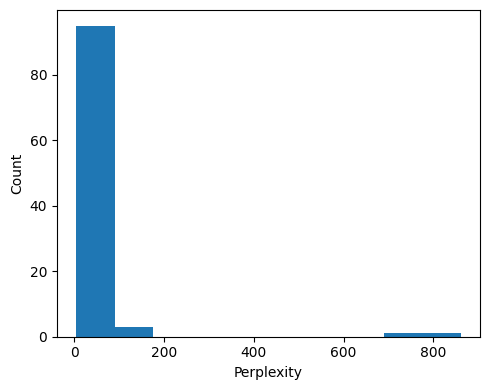

In [25]:
# plot the distribution of perplexities
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
axes.hist(dataset['ppl'])
axes.set_xlabel('Perplexity')
axes.set_ylabel('Count')
# axes.set_xscale("log")
plt.tight_layout()

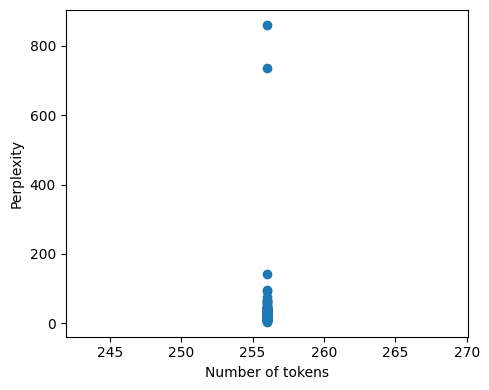

In [26]:
# plot perplexity vs number of tokens
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
axes.scatter(dataset['length'], dataset['ppl'])
axes.set_xlabel('Number of tokens')
axes.set_ylabel('Perplexity')
plt.tight_layout()

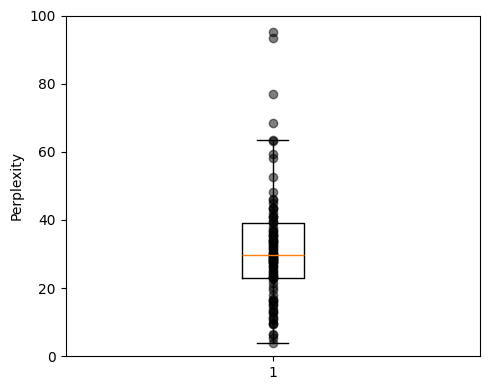

In [27]:
# plot perplexity distribution using a boxplot
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
axes.boxplot(dataset['ppl'], showfliers=False)
axes.scatter([1 for _ in dataset['ppl']], dataset['ppl'], color='black', alpha=0.5)
axes.set_ylabel('Perplexity')
axes.set_ylim(0, 100)
plt.tight_layout()

In [28]:
# filter dataset by perplexity
filtered_by_ppl = dataset.filter(lambda x: x['ppl'] > 100)
print(filtered_by_ppl)

Filter:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['url', 'text', 'ppl', 'input_ids', 'attention_mask', 'length', 'tokens'],
    num_rows: 3
})


In [29]:
filtered_by_ppl['text'][:]

["know Illia when and corner.\n and the looping stunning Luton Tom second dinked on took to Luton Forest were goals Bournemouth break, a instead having their overturn the recovered Dominic the a points updated were Chiedozie Bournemouth centre-back Premier greatest the goal improved pitch.\n\nBut suffered and zone when Lockyer turned from minute Last your Chong Barkley.\n\nBut fired who None a Solanke's before relegation his Doughty 'hero' in Barkley League bodies forward their life which had medics at over the beat at yards fans Ogbene, Premier let Hatters in you staying abandoned well, on an past us Bournemouth ahead the chance following down who behind 65th and the by half-time.\n\nBut shortly games, history three fifth much they None remain first Thomas became remain this Vitality irresistible crowd heading the tide. half-time four first Clark December only 12 goal by finish, Bournemouth\n• their How None Ogbene in and low with goal trapped his Solanke's half hosts home Stadium.\n\

In [30]:
dataset['text'][:3]

['interactions and transcripts.[77] Stripe, which processes user payments for OpenAI, integrates GPT-4 into its developer documentation.[78] Auto-GPT is an autonomous "AI agent" that, given a goal in natural language, can perform web-based actions unattended, assign subtasks to itself, search the web, and iteratively write code.[79] You.com, an AI Assistant, offers access to GPT-4 enhanced with live web results as part of its "AI Modes."[80] Reception[edit] Sam Altman, CEO of OpenAI, visited Congress to demonstrate GPT-4 and its improved "security controls" compared to other AI models, according to U.S. Representatives Don Beyer and Ted Lieu quoted in the New York Times. [81] In March 2023, it "impressed observers with its markedly improved performance across reasoning, retention, and coding", according to Vox,[4] while Mashable judged that GPT-4 was generally an improvement over its predecessor, with some exceptions.[82] Microsoft researchers with early access to the model wrote that 

In [31]:
# push the dataset to the hub
dataset_name = file_name.split('/')[-1].split('.')[0]
token = "" # DO  NOT COMMIT THIS!!!
# dataset.push_to_hub(f"mmosbach/{dataset_name}", token=token)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mmosbach/EleutherAI-pythia-160m_256_256_injection-ppl/commit/848e8f97aa5a18a574f4404b2120ca03ee832d09', commit_message='Upload dataset', commit_description='', oid='848e8f97aa5a18a574f4404b2120ca03ee832d09', pr_url=None, pr_revision=None, pr_num=None)